# Predicted probabilities of temporally out-of-sample days

In [1]:
import os
import sys
import pickle
import numpy as np
from importlib import reload
from sklearn.model_selection import GridSearchCV, GroupKFold
from sklearn.linear_model import LogisticRegression
sys.path.append('../')

import core.core_functions as cf
import core.dataset_functions as df
import core.plot_functions as pf

land_masked = True
global_mean = True
dataset_type = 'absolute_historical'
savename_append = ''

ERROR 1: PROJ: proj_create_from_database: Open of /jetfs/home/lbrunner/.conda/envs/model_learning/share/proj failed


## Load and prepare test samples (temporally out-of-sample)

In [2]:
samples = cf.get_samples(
    period=slice('2005', '2014'), 
    land_masked=land_masked,
    global_mean=global_mean,
    dataset_type=dataset_type,
    verbose=True, 
)

Number of datasets: 48
Loaded dataset 20CR
Loaded dataset ACCESS-CM2
Loaded dataset ACCESS-ESM1-5
Loaded dataset AWI-CM-1-1-MR
Loaded dataset AWI-ESM-1-1-LR
Loaded dataset BCC-CSM2-MR
Loaded dataset BCC-ESM1
Loaded dataset CAMS-CSM1-0
Loaded dataset CESM2-WACCM
Loaded dataset CESM2
Loaded dataset CESM2
Loaded dataset CMCC-CM2-HR4
Loaded dataset CMCC-CM2-SR5
Loaded dataset CMCC-ESM2
Loaded dataset CNRM-CM6-1-HR
Loaded dataset CNRM-CM6-1
Loaded dataset CNRM-ESM2-1
Loaded dataset CanESM5
Loaded dataset EC-Earth3-AerChem
Loaded dataset EC-Earth3-Veg-LR
Loaded dataset EC-Earth3-Veg
Loaded dataset EC-Earth3
Loaded dataset ERA5
Loaded dataset FGOALS-f3-L
Loaded dataset FGOALS-g3
Loaded dataset GFDL-CM4
Loaded dataset GFDL-ESM4
Loaded dataset HadGEM3-GC31-LL
Loaded dataset HadGEM3-GC31-MM
Loaded dataset INM-CM4-8
Loaded dataset INM-CM5-0
Loaded dataset IOSST
Loaded dataset IPSL-CM5A2-INCA
Loaded dataset IPSL-CM6A-LR
Loaded dataset KACE-1-0-G
Loaded dataset KIOST-ESM
Loaded dataset MERRA2
Loade

In [3]:
samples = samples.stack(feature=['lat', 'lon'])
XX = samples.values
yy = df.get_category_ids(samples['dataset_name'].values)

nan_mask = np.any(np.isnan(XX), axis=0)
XX = XX[:, ~nan_mask]

## Load trained classifier

In [4]:
savename =  'binary_logreg_{}{}{}.sav'.format(
    dataset_type,
    ('_lm' if land_masked else '') + ('_gm' if global_mean else ''),
    savename_append
)
logreg = pickle.load(open(os.path.join('../../data/trained_classifiers', savename), 'rb'))

## Test accuracy

In [5]:
logreg.score(XX, yy)

0.9999085964992459

## Plot classifier properties

<AxesSubplot: xlabel='Confidence', ylabel='Accuracy'>

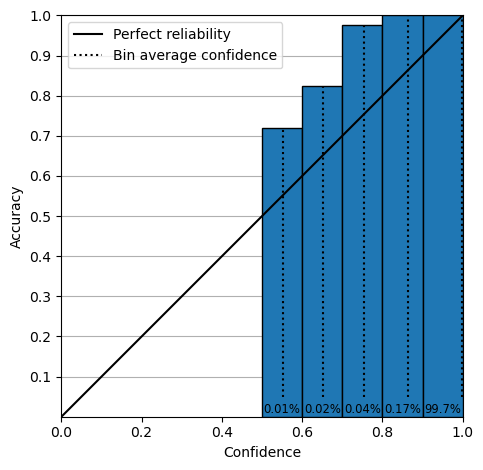

In [6]:
pf.plot_reliability_diagram(logreg, XX, yy)

<AxesSubplot: xlabel='Probability to be an observation', ylabel='Models'>

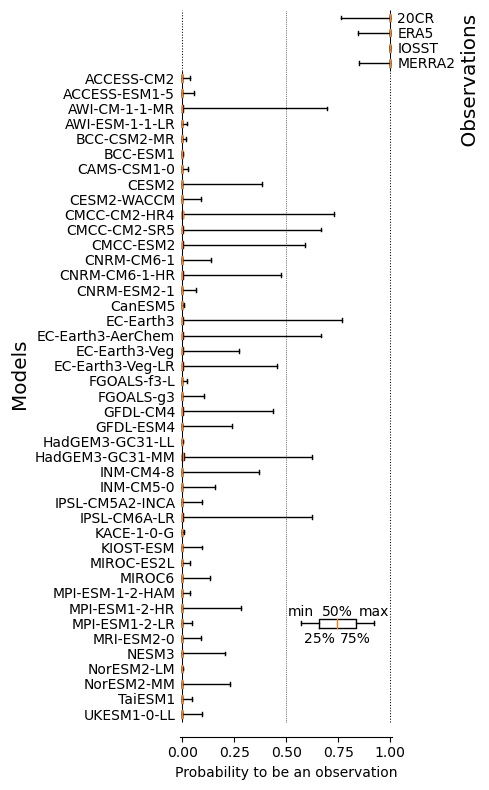

In [7]:
pf.plot_probabilities_model(
    y_pred=logreg.predict_proba(XX),
    dataset_names=samples['dataset_name'].values,
    show_legend=True,
)